In [116]:
# Imports
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [107]:
dataDir = Path.cwd().parent.parent/'data'
for root, dirs, files in os.walk(dataDir):
    for file in files:
        if file.endswith('.csv'):
            print(file)
data = dataDir/'auto-mpg-Cleaned.csv'
# data = dataDir/'car_data.csv'


auto-mpg-Cleaned.csv
car_data.csv
diabetes1.csv
gold_monthly.csv
HealthInsurance.csv
IRIS.csv
Mall_Customers (1).csv
Mall_Customers.csv
metric_test_data.csv
Monthly_Airline_Passenger_Data.csv
Position_Salaries_Simple.csv
SampleClusterData1.csv


In [108]:
df = pd.read_csv(data)
display(df[300:].head())
display(df.info())

print(df.count())

,cylinders,displacement_litre,power_kw,weight_ton,acceleration,model year,car name,kmperlitre
300,4,1.7,51,0.975,14.9,79,plymouth horizon tc3,14.67
301,4,1.4,48,0.916,19.2,79,datsun 210,13.52
302,4,1.5,51,0.966,14.7,79,fiat strada custom,15.86
303,4,2.5,66,1.211,16.0,79,buick skylark limited,12.07
304,6,2.8,85,1.177,11.3,79,chevrolet citation,12.24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cylinders           392 non-null    int64  
 1   displacement_litre  392 non-null    float64
 2   power_kw            392 non-null    int64  
 3   weight_ton          392 non-null    float64
 4   acceleration        392 non-null    float64
 5   model year          392 non-null    int64  
 6   car name            392 non-null    object 
 7   kmperlitre          392 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 24.6+ KB


None

cylinders             392
displacement_litre    392
power_kw              392
weight_ton            392
acceleration          392
model year            392
car name              392
kmperlitre            392
dtype: int64


In [109]:
df_droped = df.dropna().drop(columns=["car name"])
xn = df_droped.columns[:-1]
yn = df_droped.columns[-1:]

df_x = df_droped[xn]
df_y = df_droped[yn]

display(df_x.head())
display(df_y.head())

,cylinders,displacement_litre,power_kw,weight_ton,acceleration,model year
0,8,5.0,96,1.589,12.0,70
1,8,5.7,121,1.675,11.5,70
2,8,5.2,110,1.559,11.0,70
3,8,5.0,110,1.557,12.0,70
4,8,4.9,103,1.564,10.5,70


,kmperlitre
0,7.65
1,6.38
2,7.65
3,6.80
4,7.23


In [110]:
def SkewGraph(df):
    plt.figure(figsize=(8, 12))
    for i, col in enumerate(df.columns):
        skew_val = df[col].skew()
        plt.subplot(len(df.columns), 1, i + 1)
        sns.histplot(df[col], kde=True, color='purple')
        plt.title(f"{col}\nSkewness: {skew_val:.2f}", fontsize=14)
    plt.tight_layout()
    plt.show()

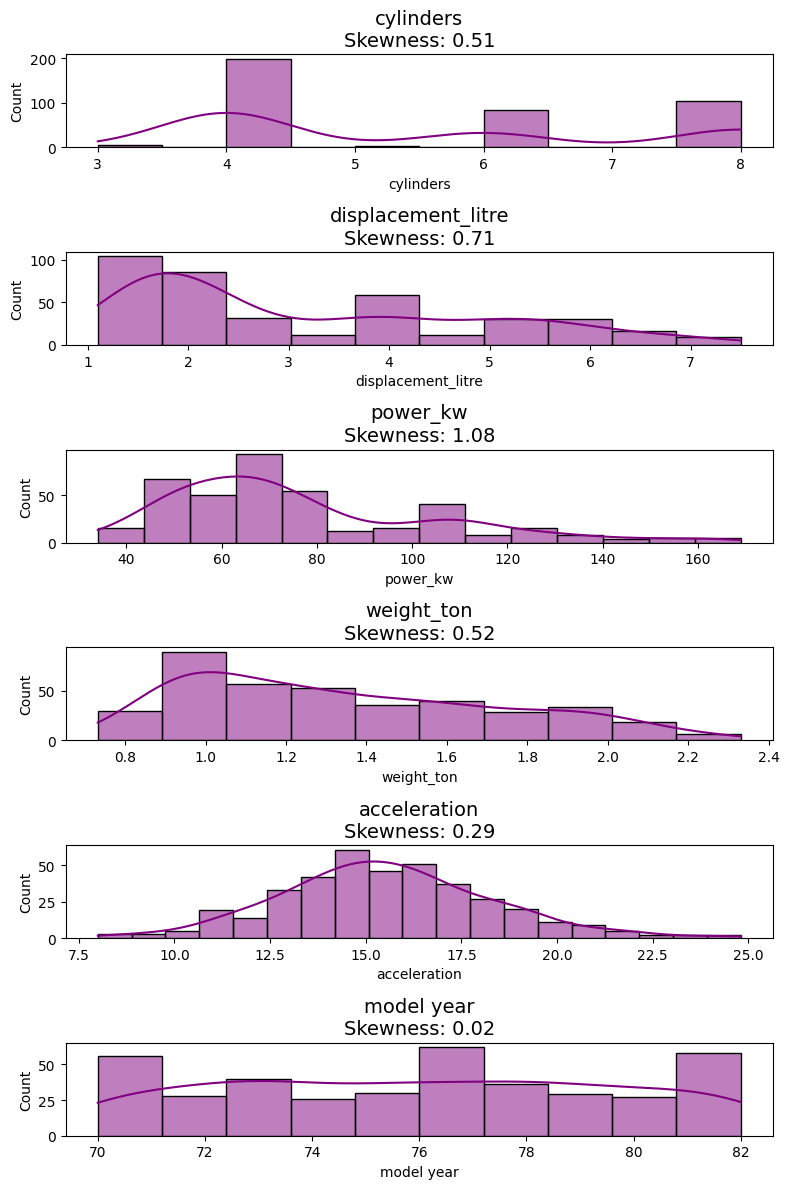

In [111]:
SkewGraph(df_x)

displacement_litre skewness: 0.71
power_kw skewness: 1.08


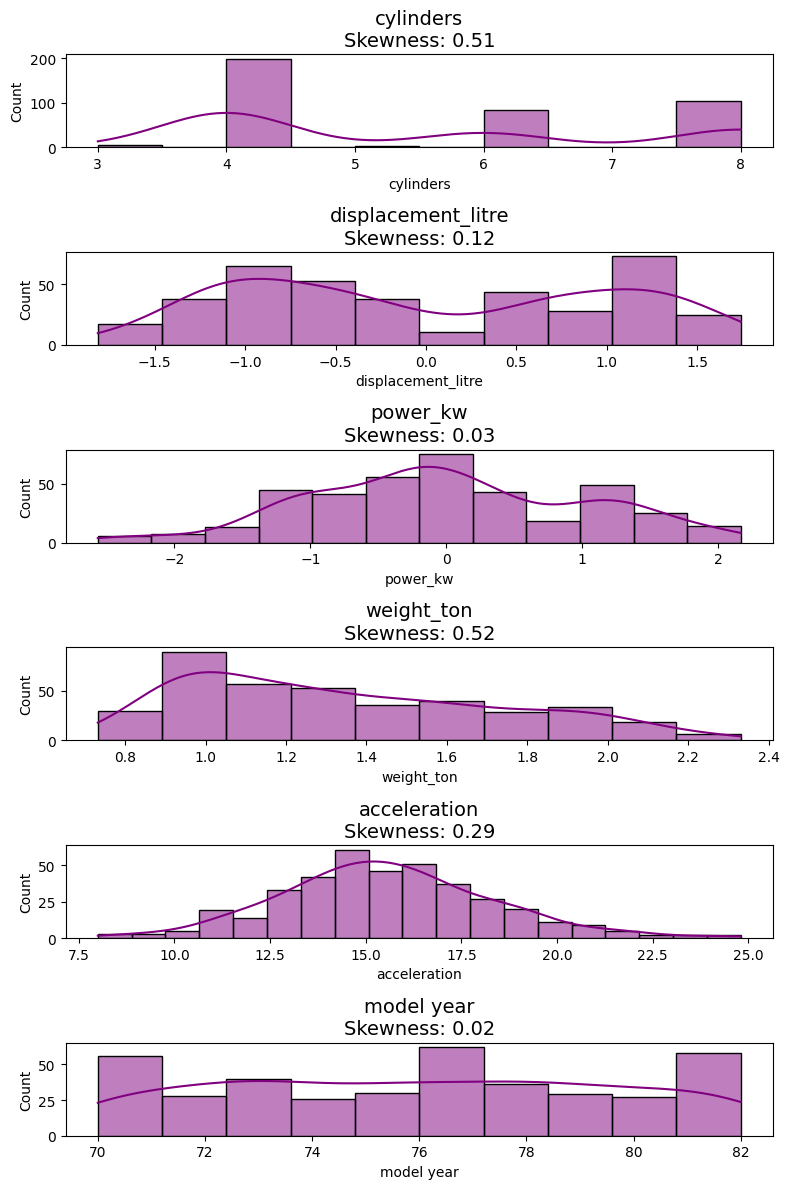

In [112]:
skewed_col = []
for i, col in enumerate(xn):
    skew_val = df_x[col].skew()
    if abs(skew_val) > 0.6:
        print(f"{col} skewness: {skew_val:.2f}")
        skewed_col.append(col)

pt = PowerTransformer(method='yeo-johnson')
df_x_transformed = pt.fit_transform(df_x[skewed_col])

df_x_transformed = pd.DataFrame(df_x_transformed, columns=skewed_col, index=df_x.index)
df_x_full = df_x.copy()
df_x_full[skewed_col] = df_x_transformed

SkewGraph(df_x_full[xn])


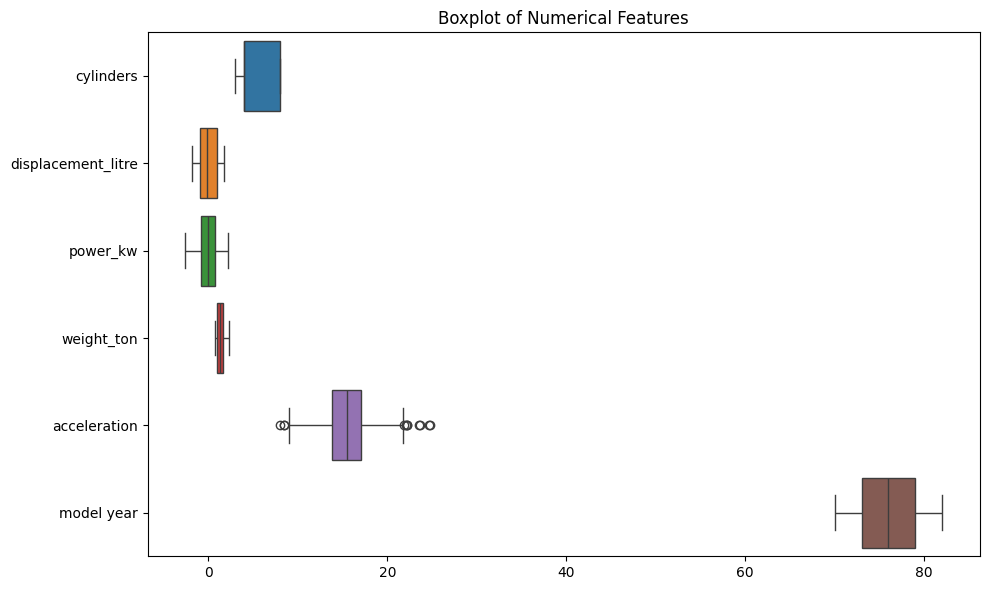

In [113]:
def BarPlot(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, orient='h')
    plt.title("Boxplot of Numerical Features")
    plt.tight_layout()
    plt.show()

BarPlot(df_x_full[xn])

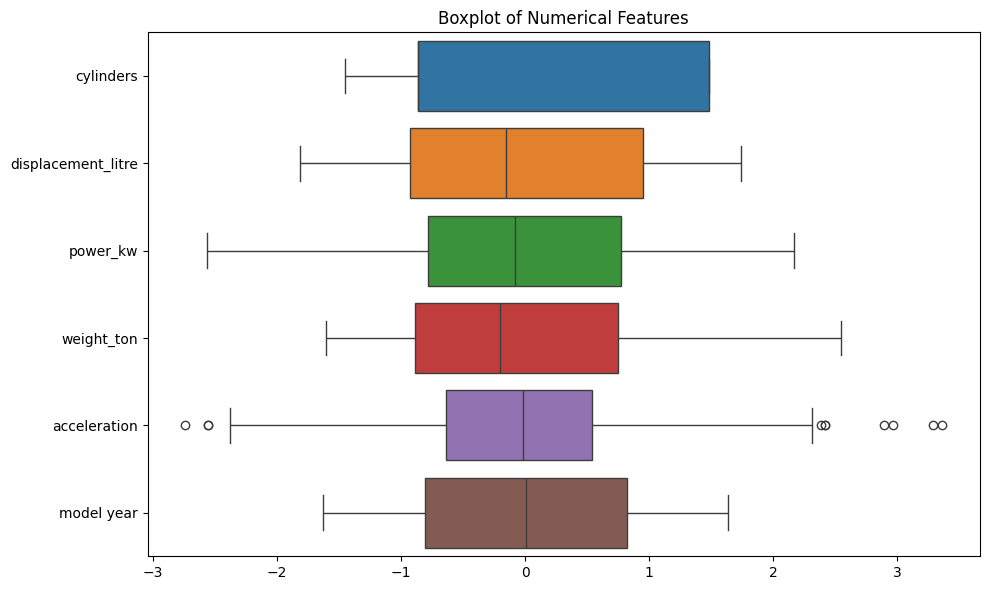

In [114]:
ss = StandardScaler()
df_x_scaled = ss.fit_transform(df_x_full[xn])
df_x_scaled = pd.DataFrame(df_x_scaled, columns=xn, index=df_x.index)

BarPlot(df_x_scaled)

KeyError: 'Fuel_Type'

<Figure size 1000x600 with 0 Axes>

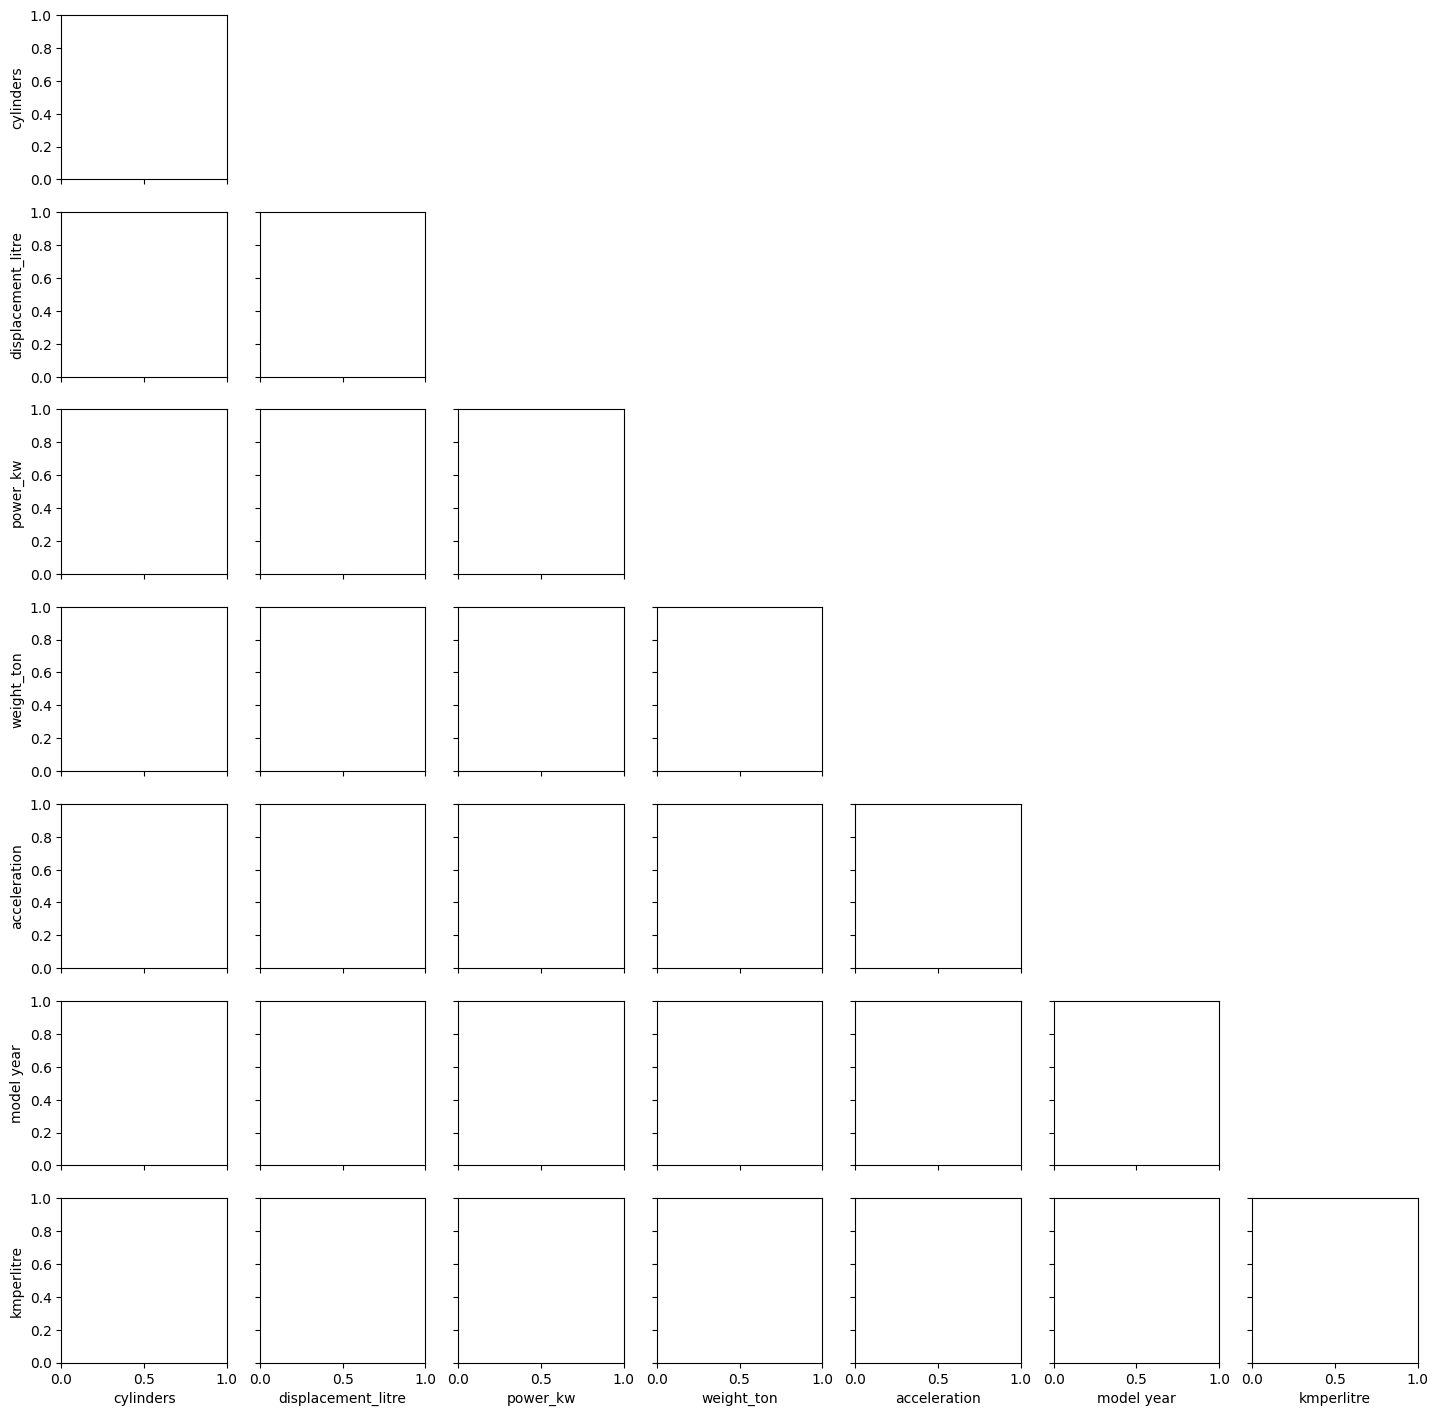

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='', corner=True)
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x_scaled, df_y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (313, 6), X_test: (79, 6)
y_train: (313, 1), y_test: (79, 1)
